# Importación de bibliotecas

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import scipy.stats as stats
%matplotlib inline

# Carga del dataset Titanic

In [2]:
# Cargamos el token de kaggle

"""
# Subirlo manualmente cada vez:

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
"""

import os

# Verificamos si el archivo ya está presente en el entorno
if not os.path.exists("/root/.kaggle/kaggle.json"):
    from google.colab import files
    print("Sube tu archivo kaggle.json")
    files.upload()
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Archivo kaggle.json cargado correctamente")
else:
    print("kaggle.json ya está cargado")



kaggle.json ya está cargado


In [3]:
# Cargamos el dataset
"""
!kaggle competitions download -c titanic
!unzip titanic.zip
"""

import os
import shutil

# Verificar si el archivo kaggle.json ya está en su lugar
kaggle_dir = os.path.expanduser("~/.kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

if not os.path.exists(os.path.join(kaggle_dir, 'kaggle.json')):
    shutil.copy('kaggle.json', kaggle_dir)
    os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)  # Cambiar permisos de seguridad
    print("Archivo kaggle.json copiado y permisos configurados.")
else:
    print("El archivo kaggle.json ya existe en el directorio ~/.kaggle.")

# Verificar si el archivo ZIP ya está descargado
zip_file = 'student-habits-vs-academic-performance.zip'
if not os.path.exists(zip_file):
    !kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance
    print("Archivo ZIP descargado.")
else:
    print("El archivo ZIP ya está descargado.")

# Descomprimir el archivo ZIP sin pedir confirmación (con opción -o para sobrescribir)
if not os.path.exists('student-habits-vs-academic-performance'):
    !unzip -o student-habits-vs-academic-performance.zip
    print("Archivo ZIP descomprimido.")
else:
    print("Los archivos ya han sido descomprimidos.")

El archivo kaggle.json ya existe en el directorio ~/.kaggle.
El archivo ZIP ya está descargado.
Archive:  student-habits-vs-academic-performance.zip
  inflating: student_habits_performance.csv  
Archivo ZIP descomprimido.


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['dataset'] = 'train'
test['dataset'] = 'test'
test['Survived'] = -1  # Creamos una columna con valores falsos para poder borrarlos más adelante

# Unión de ambos datasets
df = pd.concat([train, test], ignore_index=True)

# Descripción del Dataset

🔴 Nota: He unido los datasets "train" y "test" para poder explorar y transformar los datos de ambos conjuntos de manera homogénea.

#🔴**Overview**

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## 🔴**Data Dictionary**

============================================================================================

**Variable** ---------> **Definition** ----------------------------------------------------------> **Key**

============================================================================================

PassengerId

survival ----------> Survival ------------------------------------------------------------> 0 = No, 1 = Yes

pclass ------------> Ticket class -----------------------------------------------------> 1 = 1st, 2 = 2nd, 3 = 3rd

Name

sex -----------------> Sex

Age ----------------> Age in years

sibsp -------------> # of siblings / spouses aboard the Titanic

parch -------------> # of parents / children aboard the Titanic

ticket -------------> Ticket number

fare ----------------> Passenger fare

cabin -------------> Cabin number

embarked ------> Port of Embarkation --------------------------------------> C = Cherbourg, Q = Queenstown, S =
Southampton

============================================================================================

## 🔴**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


## Exploración de datos

1.   Para datos numéricos
*   Histogramas realizados para comprender las distribuciones
*   Corrplot
*   Tabla dinámica que compara la tasa de supervivencia entre variables numéricas

2.   Para datos categóricos
*   Realización de gráficos de barras para comprender el equilibrio de clases
*   Realización de tablas dinámicas para comprender la relación con la supervivencia

# 🔴 Variables numéricas

Aquí pongo todas las variables que están en formato "int64" o "float64", aunque algunas de estas variables sean realmente categóricas, como "Survived" (que tiene -1 para saber qué datos son los de test) y "Pclass".

PassengerId, aunque es numérica, es un identificador sin significado analítico.

In [7]:
numericos = df.select_dtypes(include=['number']).columns
print("Variables numércias:", numericos)

Variables numércias: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


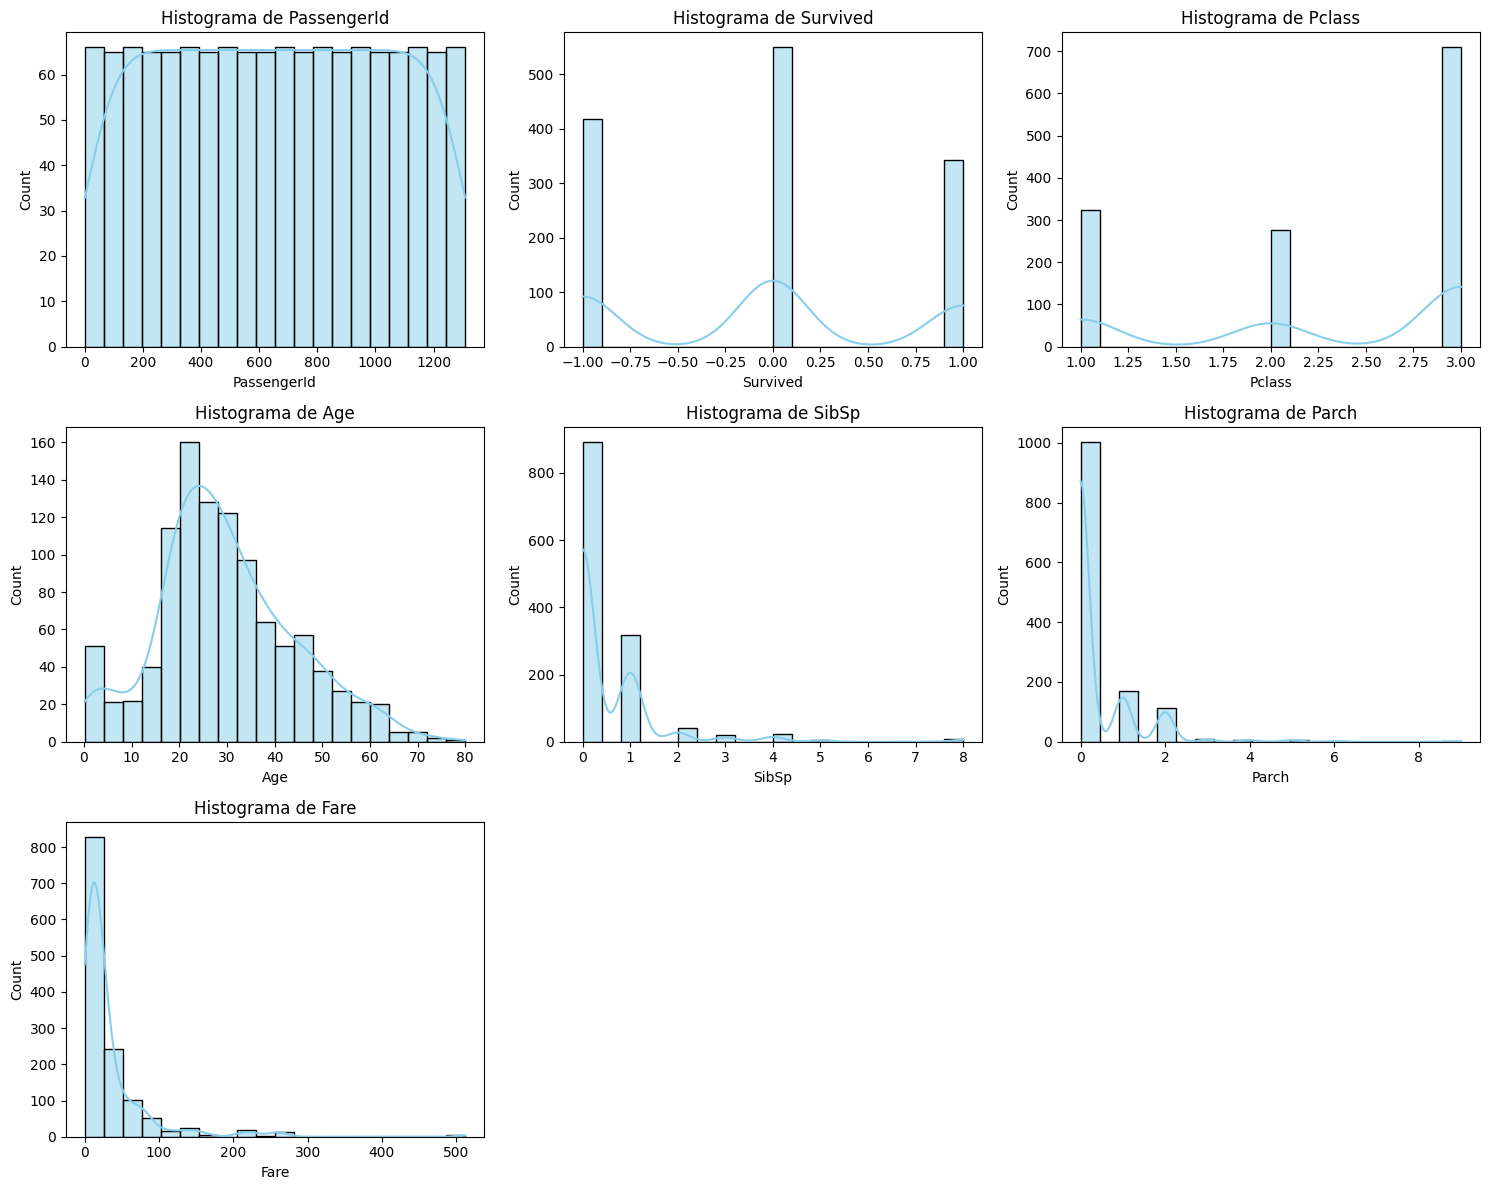

In [8]:
# Histogramas

n_cols = 3
n_vars = len(numericos)
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

for i, var in enumerate(numericos):
    row, col = divmod(i, n_cols)
    sns.histplot(df[var], bins=20, kde=True, ax=axes[row, col], color="skyblue")
    axes[row, col].set_title(f"Histograma de {var}")

# Oculta los subplots vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    row, col = divmod(j, n_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout()

In [9]:
# Nos aseguramos de que ninguna variable cumpla normalidad

import scipy.stats as stats

normalidad = {} # diccionario para almacenar las variables normales

for col in numericos:
    # Prueba de Shapiro-Wilk
  shapiro_stat, shapiro_p = stats.shapiro(df[col].dropna())
    #shapiro_test = stats.shapiro(group[col]) # Otra forma

  print(f'{col}: p={shapiro_p:.4f} => {"Normal" if (shapiro_p > 0.05) else "No normal"}')

    # Guardar resultados
  normalidad[col] = {
    "Shapiro-Wilk p-valor": round(shapiro_p, 4),

    "Normalidad (p > 0.05)": shapiro_p > 0.05
  }

PassengerId: p=0.0000 => No normal
Survived: p=0.0000 => No normal
Pclass: p=0.0000 => No normal
Age: p=0.0000 => No normal
SibSp: p=0.0000 => No normal
Parch: p=0.0000 => No normal
Fare: p=0.0000 => No normal


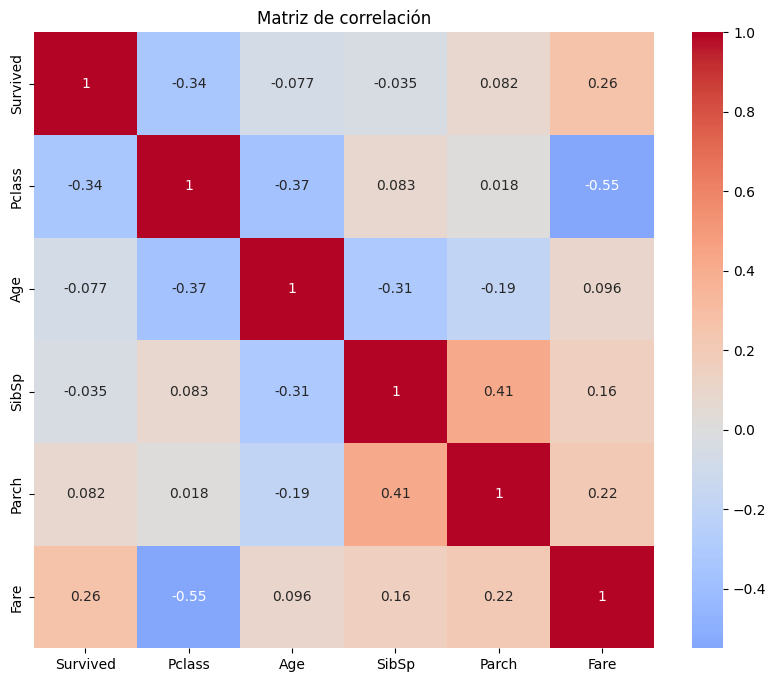

In [10]:
# Matriz de correlación

# Limpiamos los datos innecesarios para éste plot
excluir = ['PassengerId']
incluir = [col for col in numericos if col not in excluir]

# Copiamos un nuevo df sin survived (-1) y sin PassengerId
corr_df = df[df['Survived'] != -1][incluir] # Correlation Data Frame

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()

🔴 Podemos interpretar que el ratio de supervivencia está moderadamente relacionado con la tarifa (Fare) pagada de los pasajeros y con Pclass (ésta última en sentido inverso, es decir, a máyor la clase, por ejemplo, tercera clase, menos sobrevivieron, por lo que los de clase 1 sobrevivieron más que los de tercera, y esto es congruente con los resultados de Fare o tarifa, que a mayor, más sobrevivieron).


📊 Tasa de supervivencia según rangos de 'Pclass':


,Pclass_bin,Survived
0,"(0.999, 2.0]",0.557500
1,"(2.0, 3.0]",0.242363


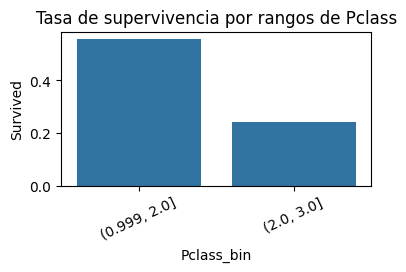


📊 Tasa de supervivencia según rangos de 'Age':


,Age_bin,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


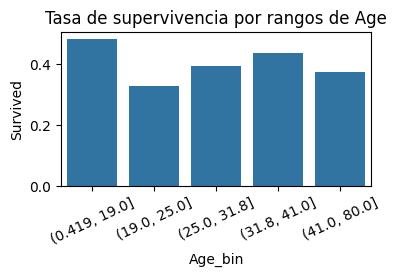


📊 Tasa de supervivencia según rangos de 'SibSp':


,SibSp_bin,Survived
0,"(-0.001, 1.0]",0.394125
1,"(1.0, 8.0]",0.270270


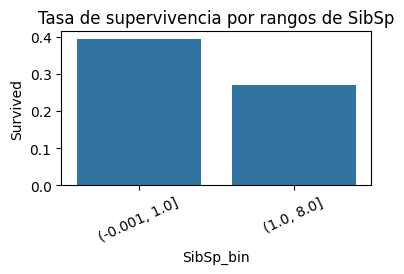


📊 Tasa de supervivencia según rangos de 'Parch':


,Parch_bin,Survived
0,"(-0.001, 1.0]",0.374372
1,"(1.0, 6.0]",0.463158


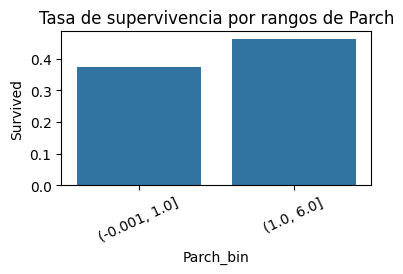


📊 Tasa de supervivencia según rangos de 'Fare':


,Fare_bin,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


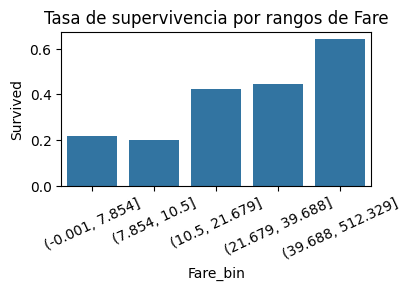

In [11]:
excluir = ['PassengerId', 'Survived'] # Añadimos Survived a exluir porque es irrelevante
incluir = [col for col in numericos if col not in excluir]

for col in incluir:
  ta_df = corr_df[[col, 'Survived']].dropna()

  # Agrupamos en 5 tramos o "bins"
  ta_df[f'{col}_bin'] = pd.qcut(ta_df[col], q=5, duplicates='drop') # "Quintiles"

  # Tasa media de supervivencia por tramo
  tabla = ta_df.groupby(f'{col}_bin', observed=False)['Survived'].mean().reset_index()

  print(f"\n📊 Tasa de supervivencia según rangos de '{col}':")
  display(tabla)

  plt.figure(figsize=(4, 2))
  sns.barplot(x=f'{col}_bin', y='Survived', data=tabla)
  plt.title(f'Tasa de supervivencia por rangos de {col}')
  plt.xticks(rotation=25)
  plt.show()

🔴 Aquí se confirma que a menor clase (clase 1 y 2), mayor tasa de supervivencia, y a mayor tarifa, mayor tasa de supervivencia.

In [12]:
# Antes de pasar a las categóricas, tengo que transformar algunas de las variables "numéricas", ya que realmente son categóricas

numToCat = ['Survived', 'Pclass']

for col in numToCat:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  dataset      1309 non-null   object  
dtypes: category(2), float64(2), int64(3), object(6)
memory usage: 115.4+ KB


# 🔴 Variables categóricas

In [13]:
categoricos = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() >= 2]
print("Variables categóricas:", categoricos)

Variables categóricas: ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'dataset']


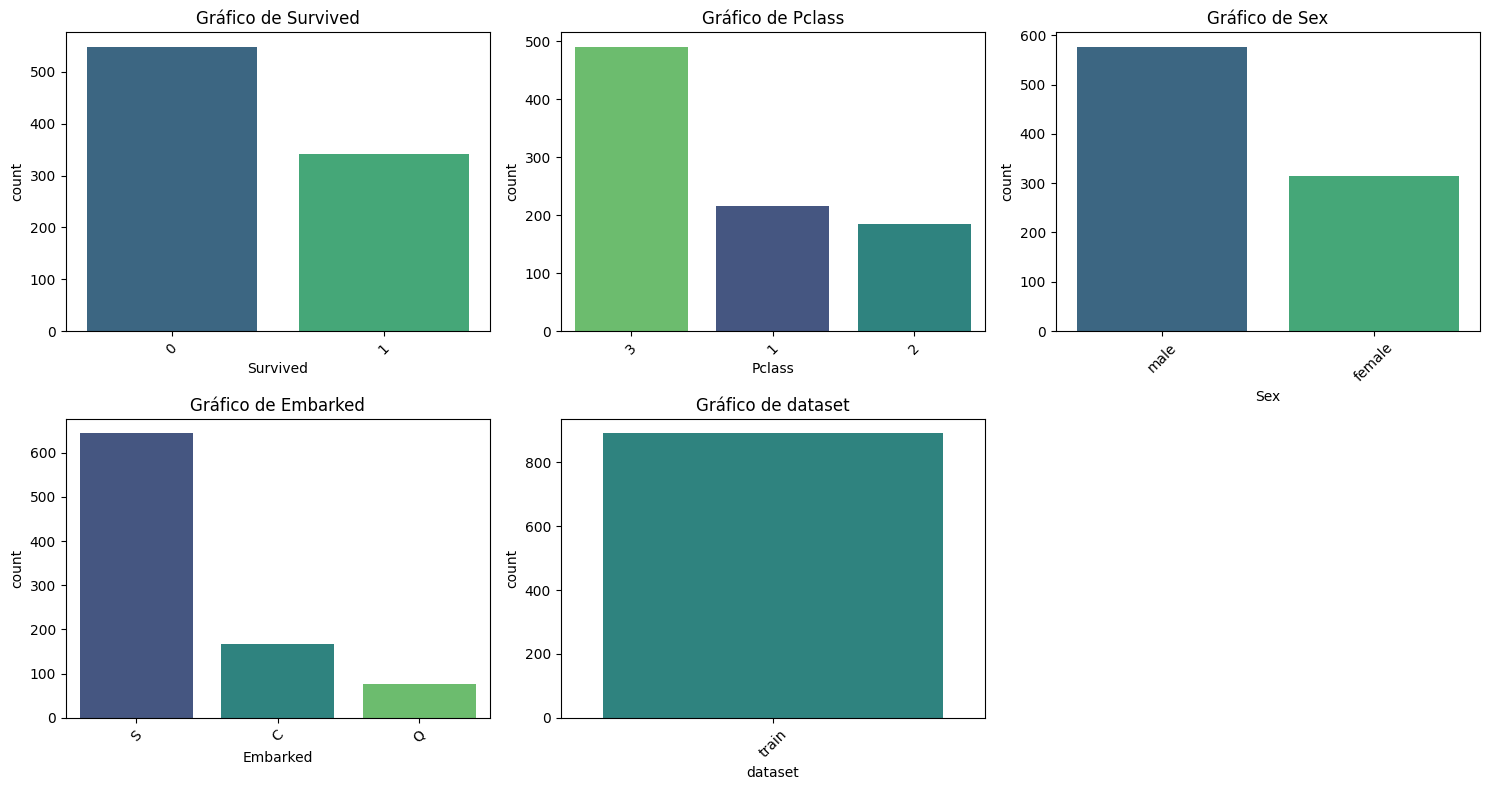

In [14]:
# Graficos de barras

# Eliminamos las variables con "demasiadas categorías" (name, ticket y cabin) y el -1 de survived,
# lo que elimina todos los registros de "test".
df_s = df[df['Survived'].isin([0, 1])].copy()
df_s['Survived'] = df_s['Survived'].cat.remove_unused_categories()
categoricos_grafico = [col for col in df_s.select_dtypes(include=['object', 'category']).columns if df_s[col].nunique() <= 10]

n_cols = 3
n_vars = len(categoricos_grafico)
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

for i, var in enumerate(categoricos_grafico):
    row, col = divmod(i, n_cols)
    sns.countplot(x=var, data=df_s, hue=var, order=df_s[var].value_counts().index, palette='viridis', ax=axes[row, col], legend=False)
    axes[row, col].set_title(f"Gráfico de {var}")
    axes[row, col].tick_params(axis='x', rotation=45)

# Oculta los subplots vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    row, col = divmod(j, n_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout()

In [15]:
# Realización de tablas dinámicas para comprender la relación con la supervivencia

for col in categoricos_grafico:
    tabla = pd.crosstab(df_s[col], df_s['Survived'], normalize='index') * 100
    if set(tabla.columns) == {0, 1}:
      tabla.columns = ['% No Sobrevive', '% Sobrevive']
    tabla = tabla.round(1)
    print(f"\n💡 Relación entre '{col}' y Supervivencia:")
    display(tabla)


💡 Relación entre 'Survived' y Supervivencia:


,% No Sobrevive,% Sobrevive
Survived,,
0,100.0,0.0
1,0.0,100.0



💡 Relación entre 'Pclass' y Supervivencia:


,% No Sobrevive,% Sobrevive
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2



💡 Relación entre 'Sex' y Supervivencia:


,% No Sobrevive,% Sobrevive
Sex,,
female,25.8,74.2
male,81.1,18.9



💡 Relación entre 'Embarked' y Supervivencia:


,% No Sobrevive,% Sobrevive
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7



💡 Relación entre 'dataset' y Supervivencia:


,% No Sobrevive,% Sobrevive
dataset,,
train,61.6,38.4


🔴 Podemos ver como hay una clara tendencia del sexo femenino a sobrevivir, a la vez que (ya lo hemos visto anteriormente) una relación entr la primera clase y las posibilidades de supervivencia.

# Ingeniería de características

1.   Camarote - Simplificar los camarotes (se evaluó si el tipo de camarote (cabin_adv) o la compra de billetes en varios camarotes (cabin_multiple) influían en la supervivencia)
2.   Billetes - ¿Influyen los distintos tipos de billetes en las tasas de supervivencia?
3.   ¿Relaciona el título de una persona con las tasas de supervivencia?

In [16]:
# CAMAROTES
# Usaré df_s ya que necesito calcular la influencia de los camarotes en la supervivencia

df_s['cabin_adv'] = df_s['Cabin'].str[0]  # Extraer la letra del camarote
df_s['cabin_adv'] = df_s['cabin_adv'].fillna('Unknown')  # Rellenar nulos

df_s['cabin_multiple'] = df_s['Cabin'].apply(lambda x: 1 if isinstance(x, str) and len(x.split()) > 1 else 0)

# Tabla cruzada cabin_adv vs Survived
print(pd.crosstab(df_s['cabin_adv'], df_s['Survived'], normalize='index'), "\n\n")

# Tabla cruzada cabin_multiple vs Survived
print(pd.crosstab(df_s['cabin_multiple'], df_s['Survived'], normalize='index'))


Survived          0         1
cabin_adv                    
A          0.533333  0.466667
B          0.255319  0.744681
C          0.406780  0.593220
D          0.242424  0.757576
E          0.250000  0.750000
F          0.384615  0.615385
G          0.500000  0.500000
T          1.000000  0.000000
Unknown    0.700146  0.299854 


Survived               0         1
cabin_multiple                    
0               0.621684  0.378316
1               0.416667  0.583333


🔴 Es muy revelador observar cómo hay algunos códigos de camarotes (designan distintas zonas del barco) donde el ratio de supervivencia o deceso está igualado, mientras que en otros la supervivencia claramente está favorecida. Tamibién reseñables los camarotes con la letra "T", en los que no parece haber sobrevivido nadie.

🔴 En la segunda tebla, también es interesante ver cómo los pasajeros que pagaron múltiples camarotes tuvieron un 58% de posibilidades de sobrevivir, mientras que el resto de la muestra, sólo un 38%.

In [17]:
# BILLETES
# Parece que todos los tickets tienen un prefijo antes de la parte numérica del código diferencial
# Voy a extraer dichos prefijos, y sumar

# Transformo Survived a int para poder operar
df_s['Survived'] = df_s['Survived'].astype(int)

# Extraer prefijo del ticket (si se encuentra separado por un espacio del código)
df_s['ticket_prefix'] = df_s['Ticket'].apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else 'NoPrefix')

# Tasa de supervivencia por prefijo
prefix_survival = df_s.groupby('ticket_prefix').agg(
    survival_rate=('Survived', 'mean'),
     ticket_count=('Ticket', 'count')
     ).sort_values(by='ticket_count', ascending=False)

print(prefix_survival.head(12))

               survival_rate  ticket_count
ticket_prefix                             
NoPrefix            0.383459           665
PC                  0.650000            60
C.A.                0.481481            27
STON/O              0.416667            12
A/5                 0.100000            10
W./C.               0.111111             9
CA.                 0.125000             8
SOTON/O.Q.          0.125000             8
SOTON/OQ            0.142857             7
A/5.                0.142857             7
CA                  0.000000             6
STON/O2.            0.500000             6


In [18]:
num_prefijos = df_s['ticket_prefix'].nunique()
print(f"Número de prefijos distintos: {num_prefijos}")

Número de prefijos distintos: 43


🔴 Habiendo 43 prefijos distintos (incluyendo los que no tienen prefijo en un grupo), es interesante ver como 38 de ellos perteneciían a grupos de menos de 10 personas.

🔴 Parece que hay una serie de tickets con unos prefijos que tienen un ratio del 100% de supervivencia, pero es porque sólo lo tenía una persona, y ésta sobrevivió.

In [19]:
# Algunos pasajeros compartieron ticket, hago un cálculo para ver si hay alguna relación

# Número de pasajeros por ticket
ticket_counts = df_s.groupby('Ticket').size().rename('num_passengers')

# Número de supervivientes por ticket
ticket_survived = df_s.groupby('Ticket')['Survived'].sum().rename('num_survived')

# Nuevo DataFrame
ticket_summary = pd.concat([ticket_counts, ticket_survived], axis=1)

# Proporción de supervivencia por ticket
ticket_summary['survival_rate'] = ticket_summary['num_survived'] / ticket_summary['num_passengers']

# Representamos los casos de los tickets compartidos por el mayor número de personas
print(ticket_summary.sort_values(by='num_passengers', ascending=False).head(12))

              num_passengers  num_survived  survival_rate
Ticket                                                   
1601                       7             5       0.714286
CA. 2343                   7             0       0.000000
347082                     7             0       0.000000
CA 2144                    6             0       0.000000
3101295                    6             0       0.000000
347088                     6             0       0.000000
382652                     5             0       0.000000
S.O.C. 14879               5             0       0.000000
349909                     4             0       0.000000
2666                       4             4       1.000000
19950                      4             2       0.500000
W./C. 6608                 4             0       0.000000


🔴 Parece haber una influencia, negativa, en el número de personas por ticket, ya que hay muy pocos supervivientes dentro de los casos con los billetes más compartidos

In [20]:
# TÍTULO

# Extraemos título de Name
df_s['Title'] = df_s['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()

# Agrupamos por título y calculamos la tasa de supervivencia
title_stats = df_s.groupby('Title').agg(
    survival_rate=('Survived', 'mean'),
    count=('Survived', 'count')
).sort_values(by='count', ascending=False)

print(title_stats)

              survival_rate  count
Title                             
Mr                 0.156673    517
Miss               0.697802    182
Mrs                0.792000    125
Master             0.575000     40
Dr                 0.428571      7
Rev                0.000000      6
Mlle               1.000000      2
Major              0.500000      2
Col                0.500000      2
Capt               0.000000      1
Lady               1.000000      1
Don                0.000000      1
Jonkheer           0.000000      1
Mme                1.000000      1
Ms                 1.000000      1
Sir                1.000000      1
the Countess       1.000000      1


🔴 Podemos ver que el ratio de supervivencia más alto es para los títulos correspondientes a mujeres (Miss y Mrs), siguiendole Master (niños) con aproximadamente un 20% menos ratio de supervivencia que las mujeres. Los hombres (Mr), solo tienen un 15% de ratio de supervivencia.

# Preprocesamiento de datos para el modelo

1.   Eliminar los valores nulos de Embarcado (sólo 2)
2.   Incluir sólo las variables relevantes (Como tenemos datos limitados, se debe excluir caracteristicas
3.    Hacer transformaciones categóricas en todos los datos (utilice el codificador onehot).
4.   Impute los datos con la media de la tarifa y la edad (también debería experimentar con la mediana)
5.   Normalice la tarifa utilizando el logaritmo para darle más apariencia de distribución normal
6.   Escale los datos 0-1 con un escalador estándar

# Construcción del modelo

*   Logistic Regression
*   Decision Tree
*   K Nearest Neighbor
*   Random Forest
*   Support Vector Classifier